### BANK INFORMATION PREDICT WHETHER CUSTOMER WILL SUBSCRIBE OR NOT (Y)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
sns.set_style('darkgrid')
sns.set_palette('viridis')

In [2]:
train = pd.read_csv('bank-additional-full.csv',sep=';')
test = pd.read_csv('bank-additional.csv',sep=';')

In [3]:
train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
test.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
age               4119 non-null int64
job               4119 non-null object
marital           4119 non-null object
education         4119 non-null object
default           4119 non-null object
housing           4119 non-null object
loan              4119 non-null object
contact           4119 non-null object
month             4119 non-null object
day_of_week       4119 non-null object
duration          4119 non-null int64
campaign          4119 non-null int64
pdays             4119 non-null int64
previous          4119 non-null int64
poutcome          4119 non-null object
emp.var.rate      4119 non-null float64
cons.price.idx    4119 non-null float64
cons.conf.idx     4119 non-null float64
euribor3m         4119 non-null float64
nr.employed       4119 non-null float64
y                 4119 non-null object
dtypes: float64(5), int64(5), object(11)
memory usage: 675.9+ KB


In [7]:
train['pdays'].value_counts()

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
19         3
22         3
21         2
26         1
20         1
25         1
27         1
Name: pdays, dtype: int64

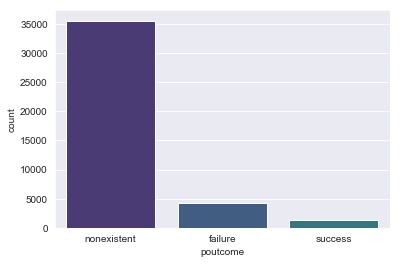

In [8]:
sns.countplot(x=train['poutcome'])

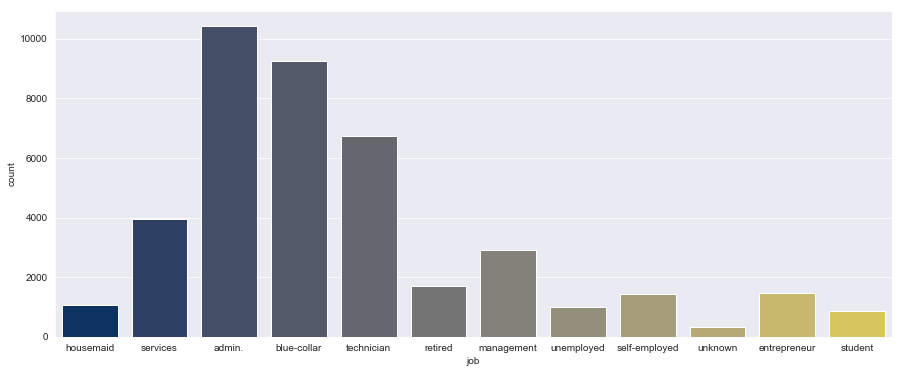

In [9]:
plt.figure(figsize=(15,6))
sns.countplot(x=train['job'],palette='cividis')

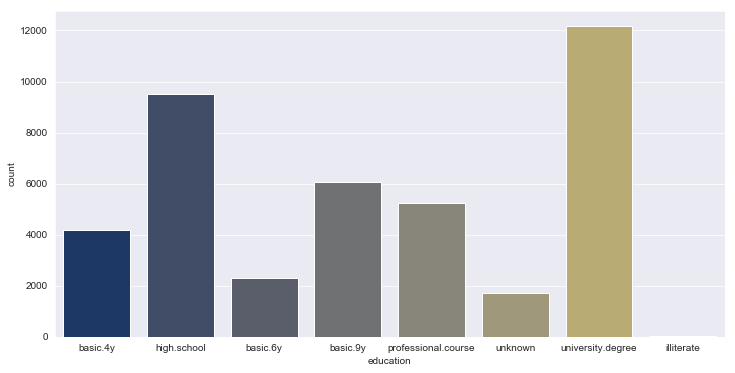

In [10]:
plt.figure(figsize=(12,6))
sns.countplot(x=train['education'],palette='cividis')

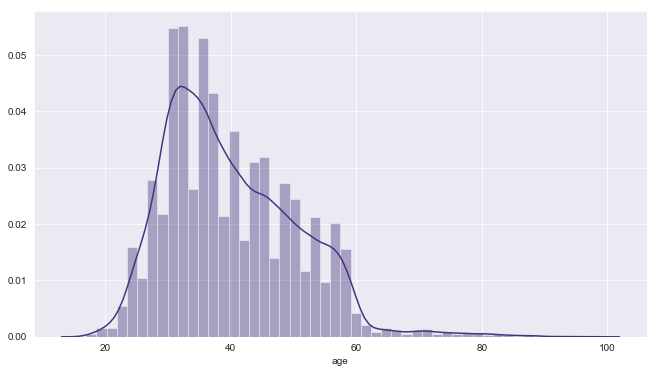

In [11]:
plt.figure(figsize=(11,6))
sns.distplot(train['age'])

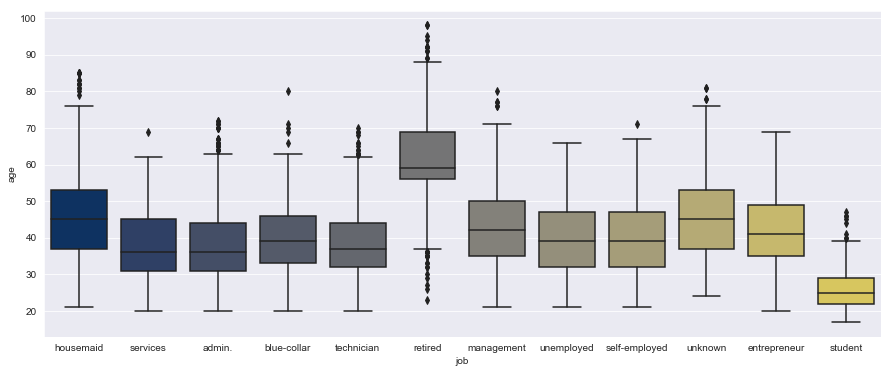

In [12]:
plt.figure(figsize=(15,6))
sns.boxplot(x='job',y='age',data=train,palette='cividis')

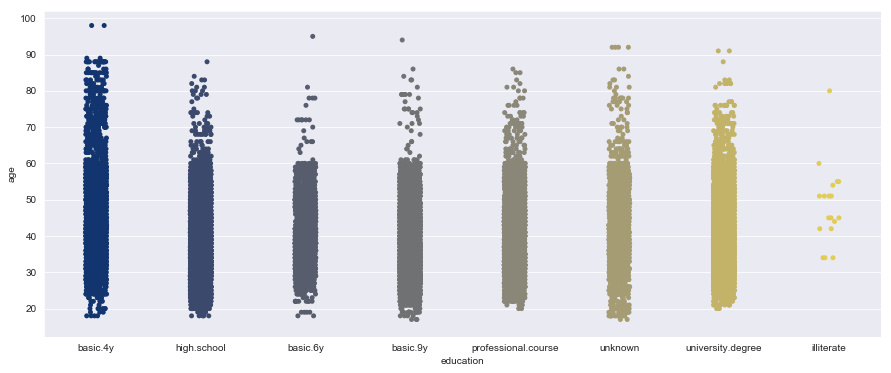

In [13]:
plt.figure(figsize=(15,6))
sns.stripplot(x='education',y='age',data=train,palette='cividis')

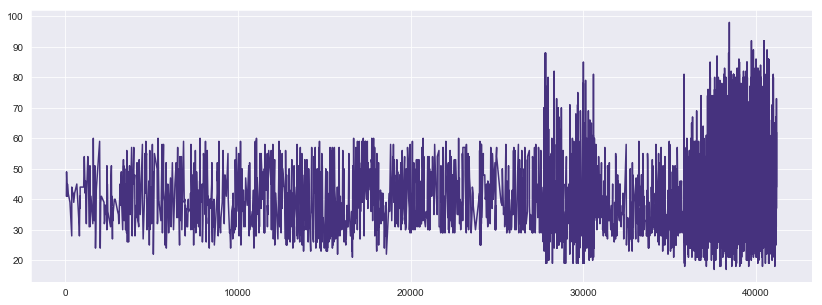

In [14]:
plt.figure(figsize=(14,5))
train[train['y']=='yes']['age'].plot()

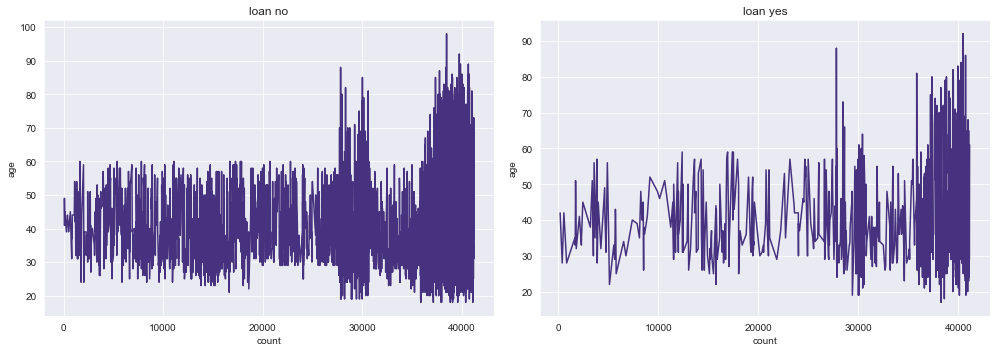

In [16]:
fig,newAxes = plt.subplots(nrows = 1, ncols = 2,figsize=(14,5)) #this arranges it in rows and colums
newAxes[0].plot(train[(train['y']=='yes') & (train['loan']=='no')]['age'])
newAxes[0].set_xlabel('count')
newAxes[0].set_ylabel('age')
newAxes[0].set_title('loan no')

newAxes[1].plot(train[(train['y']=='yes') & (train['loan']=='yes')]['age'])
newAxes[1].set_xlabel('count')
newAxes[1].set_ylabel('age')
newAxes[1].set_title('loan yes')

#incase of overlappig we use
plt.tight_layout()

In [17]:
dayMonth = train.groupby(['day_of_week','month']).count()['job'].unstack()

In [18]:
dayMonth

month,apr,aug,dec,jul,jun,mar,may,nov,oct,sep
day_of_week,,,,,,,,,,
fri,610,1070,24,1012,1147,94,2858,755,142,115
mon,702,1222,53,1516,1251,143,2642,766,129,90
thu,768,1347,45,1672,967,99,2537,903,163,122
tue,252,1296,25,1517,970,140,2809,814,149,118
wed,300,1243,35,1457,983,70,2923,863,135,125


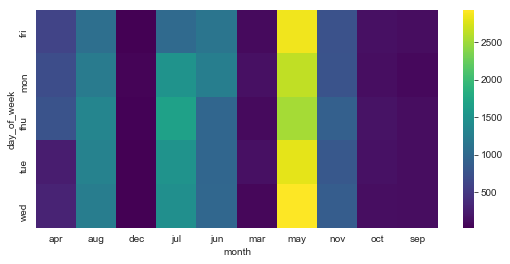

In [19]:
plt.figure(figsize=(9,4))
sns.heatmap(dayMonth,cmap='viridis')

<Figure size 648x288 with 0 Axes>

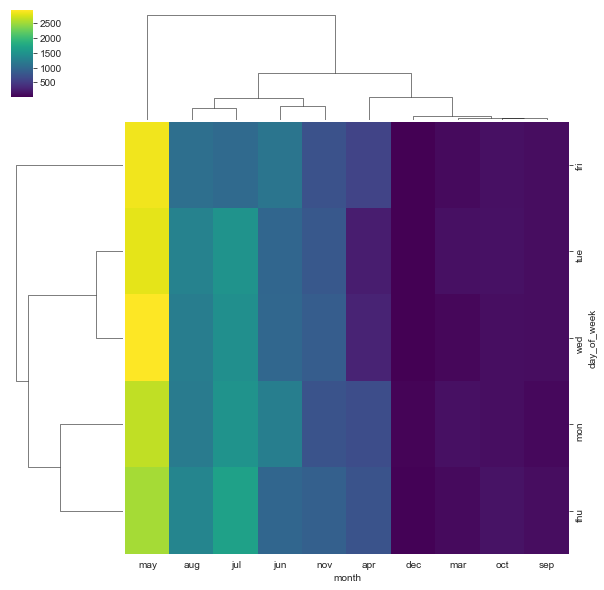

In [20]:
plt.figure(figsize=(9,4))
sns.clustermap(dayMonth,cmap='viridis')

In [21]:
train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [22]:
train['housing'].unique()

array(['no', 'yes', 'unknown'], dtype=object)

In [23]:
dmap ={'yes':2,'no':1,'unknown':0}

In [24]:
train['default'] = train['default'].map(dmap)
train['housing'] = train['housing'].map(dmap)
train['loan'] = train['loan'].map(dmap)
test['housing'] = test['housing'].map(dmap)
test['loan'] = test['loan'].map(dmap)
test['default'] = test['default'].map(dmap)

In [25]:
job = pd.get_dummies(train['job'],drop_first = True)
marital = pd.get_dummies(train['marital'],drop_first = True)
education = pd.get_dummies(train['education'],drop_first = True)
contact = pd.get_dummies(train['contact'],drop_first = True)
month = pd.get_dummies(train['month'],drop_first = True)
dayOW = pd.get_dummies(train['day_of_week'],drop_first = True)
poutcome = pd.get_dummies(train['poutcome'],drop_first = True)
train = pd.concat([train,job,marital,education,contact,month,dayOW,poutcome],axis = 1)
job1 = pd.get_dummies(test['job'],drop_first = True)
marital1 = pd.get_dummies(test['marital'],drop_first = True)
education1 = pd.get_dummies(test['education'],drop_first = True)
contact1 = pd.get_dummies(test['contact'],drop_first = True)
month1 = pd.get_dummies(test['month'],drop_first = True)
dayOW1 = pd.get_dummies(test['day_of_week'],drop_first = True)
poutcome1 = pd.get_dummies(test['poutcome'],drop_first = True)
test = pd.concat([test,job1,marital1,education1,contact1,month1,dayOW1,poutcome1],axis = 1)

In [26]:
train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,may,nov,oct,sep,mon,thu,tue,wed,nonexistent,success
0,56,housemaid,married,basic.4y,1,1,1,telephone,may,mon,...,1,0,0,0,1,0,0,0,1,0
1,57,services,married,high.school,0,1,1,telephone,may,mon,...,1,0,0,0,1,0,0,0,1,0
2,37,services,married,high.school,1,2,1,telephone,may,mon,...,1,0,0,0,1,0,0,0,1,0
3,40,admin.,married,basic.6y,1,1,1,telephone,may,mon,...,1,0,0,0,1,0,0,0,1,0
4,56,services,married,high.school,1,1,2,telephone,may,mon,...,1,0,0,0,1,0,0,0,1,0


In [27]:
X_train = train.drop(['job','marital','education','day_of_week','month','contact','poutcome','y'],axis = 1)
y_train = train['y']
X_test = test.drop(['job','marital','education','day_of_week','month','contact','poutcome','y'],axis = 1)
y_test = test['y']

In [28]:
X_train.head()

,age,default,housing,loan,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,...,may,nov,oct,sep,mon,thu,tue,wed,nonexistent,success
0,56,1,1,1,261,1,999,0,1.1,93.994,...,1,0,0,0,1,0,0,0,1,0
1,57,0,1,1,149,1,999,0,1.1,93.994,...,1,0,0,0,1,0,0,0,1,0
2,37,1,2,1,226,1,999,0,1.1,93.994,...,1,0,0,0,1,0,0,0,1,0
3,40,1,1,1,151,1,999,0,1.1,93.994,...,1,0,0,0,1,0,0,0,1,0
4,56,1,1,2,307,1,999,0,1.1,93.994,...,1,0,0,0,1,0,0,0,1,0


In [34]:
from sklearn.preprocessing import StandardScaler

In [30]:
scaler = StandardScaler()

In [31]:
scaled_feautures = scaler.fit_transform(X_train)
scaled_feautures1 = scaler.fit_transform(X_test)

In [32]:
X_train = pd.DataFrame(scaled_feautures,columns=X_train.columns)
X_test = pd.DataFrame(scaled_feautures1,columns=X_test.columns)

In [33]:
X_train.head()

,age,default,housing,loan,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,...,may,nov,oct,sep,mon,thu,tue,wed,nonexistent,success
0,1.533034,0.513260,-0.915462,-0.319712,0.010471,-0.565922,0.195414,-0.349494,0.648092,0.722722,...,1.411155,-0.332532,-0.133197,-0.118462,1.959,-0.514581,-0.494394,-0.496067,0.397706,-0.1857
1,1.628993,-1.946613,-0.915462,-0.319712,-0.421501,-0.565922,0.195414,-0.349494,0.648092,0.722722,...,1.411155,-0.332532,-0.133197,-0.118462,1.959,-0.514581,-0.494394,-0.496067,0.397706,-0.1857
2,-0.290186,0.513260,0.916174,-0.319712,-0.124520,-0.565922,0.195414,-0.349494,0.648092,0.722722,...,1.411155,-0.332532,-0.133197,-0.118462,1.959,-0.514581,-0.494394,-0.496067,0.397706,-0.1857
3,-0.002309,0.513260,-0.915462,-0.319712,-0.413787,-0.565922,0.195414,-0.349494,0.648092,0.722722,...,1.411155,-0.332532,-0.133197,-0.118462,1.959,-0.514581,-0.494394,-0.496067,0.397706,-0.1857
4,1.533034,0.513260,-0.915462,2.184721,0.187888,-0.565922,0.195414,-0.349494,0.648092,0.722722,...,1.411155,-0.332532,-0.133197,-0.118462,1.959,-0.514581,-0.494394,-0.496067,0.397706,-0.1857


In [35]:
from sklearn.svm import SVC

In [36]:
model = SVC()

In [37]:
model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [38]:
predictions = model.predict(X_test)

In [39]:
from sklearn.metrics import confusion_matrix,classification_report

In [40]:
print(classification_report(y_test,predictions))
print('\n')
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

          no       0.94      0.99      0.96      3668
         yes       0.79      0.47      0.59       451

   micro avg       0.93      0.93      0.93      4119
   macro avg       0.87      0.73      0.78      4119
weighted avg       0.92      0.93      0.92      4119



[[3613   55]
 [ 238  213]]


In [41]:
from sklearn.model_selection import GridSearchCV

In [42]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

In [43]:
grid =GridSearchCV(SVC(),param_grid,verbose=3,refit=True)

In [44]:
grid.fit(X_train,y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  C=0.1, gamma=1, kernel=rbf, score=0.8873270211216314, total= 2.8min
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  3.6min remaining:    0.0s


[CV]  C=0.1, gamma=1, kernel=rbf, score=0.8873270211216314, total= 2.9min
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  7.2min remaining:    0.0s


[CV]  C=0.1, gamma=1, kernel=rbf, score=0.8873834498834499, total= 2.6min
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.8873270211216314, total= 1.3min
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.8118718135469775, total= 1.2min
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.6214306526806527, total=  51.4s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, score=0.8875455207574654, total=  18.3s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, score=0.6943918426802622, total=  18.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, score=0.2595425407925408, total=  10.5s
[CV] C=0.1, gamma=0.001, kernel=rbf .....

[CV]  C=100, gamma=0.0001, kernel=rbf, score=0.751128914785142, total=  17.3s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV]  C=100, gamma=0.0001, kernel=rbf, score=0.2537878787878788, total=   9.7s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV]  C=1000, gamma=1, kernel=rbf, score=0.8875455207574654, total= 4.5min
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV]  C=1000, gamma=1, kernel=rbf, score=0.8728332119446468, total= 4.4min
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV]  C=1000, gamma=1, kernel=rbf, score=0.8503787878787878, total= 4.2min
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV]  C=1000, gamma=0.1, kernel=rbf, score=0.8875455207574654, total= 2.3min
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV]  C=1000, gamma=0.1, kernel=rbf, score=0.6893663510560816, total= 1.9min
[CV] C=1000, gamma=0.1, kernel=rbf ...

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed: 156.0min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [45]:
grid.best_params_

{'C': 0.1, 'gamma': 0.0001, 'kernel': 'rbf'}

In [46]:
grid.best_estimator_

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [47]:
grid_pred = grid.predict(X_test)